## Imports

In [1]:
import pandas as pd
import numpy as np
import math

In [2]:
from collections import defaultdict

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

In [4]:
# Add path to book code
import os
import sys

sys.path.append( os.path.join( '.', 'original', 'code') )

In [5]:
from original.code import nsfg

## Data Source

In [6]:
df_orig = nsfg.ReadFemPreg('original/code/2002FemPreg.dct', 'original/code/2002FemPreg.dat.gz')
print(f'Shape : {df_orig.shape}')
df_orig.head()

Shape : (13593, 244)


,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


In [7]:
# Focus on relevant columns
relevant_cols = ['caseid', 'prglngth', 'outcome', 'pregordr', 'birthord', 'birthwgt_lb', 'birthwgt_oz', 'agepreg', 'finalwgt']
preg = df_orig.loc[:, relevant_cols]  # Not using loc here will lead to SettingWithCopyWarning
                                    # since pandas will not be able to ascertain if df is a view or a copy
# Calculate Total Weight
preg['totalwgt_lb'] = preg.birthwgt_lb + preg.birthwgt_oz / 16.0
print(f'Shape: {preg.shape}')

Shape: (13593, 10)


In [8]:
# Respondents Data
resp = nsfg.ReadFemResp('original/code/2002FemResp.dct', 
                        'original/code/2002FemResp.dat.gz')

In [9]:
# Areas of focus
live = preg.loc[preg.outcome == 1]
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

## Cumulative Distributions

#### Terms
* Percentile Rank - Fraction of scores leq than your score
* Percentile - An actual score
* Median - 50 percentile
* Interquartile Range (IQR) - difference between 75th and 25th percentile

In [10]:
def calc_cdf(ser):
    return ser.value_counts(normalize=True).sort_index().cumsum()

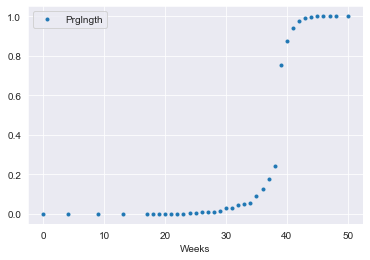

In [11]:
# CDF - Pregnancy Length
prglngth_cdf = live.prglngth.value_counts(normalize=True).sort_index().cumsum()
prglngth_cdf.plot(style='.', label='Prglngth', xlabel='Weeks');
plt.legend();

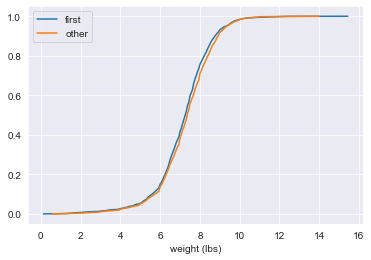

In [12]:
# CDF - Weights
first_wgt_cdf = calc_cdf(firsts.totalwgt_lb)
others_wgt_cdf = calc_cdf(others.totalwgt_lb)

ax = first_wgt_cdf.plot(label='first', xlabel='weight (lbs)')
others_wgt_cdf.plot(ax=ax, label='other')
ax.legend();

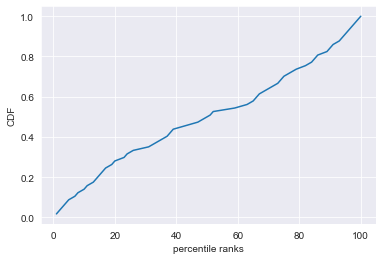

In [13]:
# CDF of Randomly Sampled Data

## Original CDF
weights = live.totalwgt_lb
weight_cdf = calc_cdf(weights)

## Sampled Data
samples = np.random.choice(weights.dropna(), 100, replace=True)
ranks = calc_cdf(pd.Series(samples))*100 # Percentile ranks of sampled data
rank_cdf = calc_cdf(ranks) # CDF of percentile ranks
rank_cdf.plot(xlabel='percentile ranks', ylabel='CDF');

# Exercises

**Exercise:** The numbers generated by `numpy.random.random` are supposed to be uniform between 0 and 1; that is, every value in the range should have the same probability.

Generate 1000 numbers from `numpy.random.random` and plot their PMF.  What goes wrong?

Now plot the CDF. Is the distribution uniform?

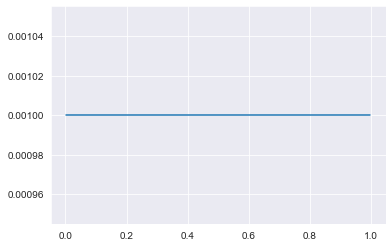

In [14]:
test = np.random.random(1000)
test_pmf = pd.Series(test).value_counts(normalize=True).sort_index()
test_pmf.plot();

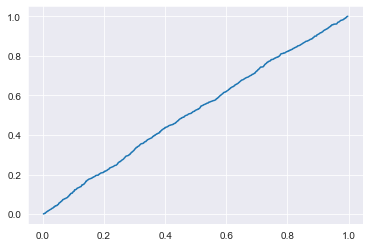

In [15]:
test_cdf = test_pmf.cumsum()
test_cdf.plot();